Question: How Does unlimited vacation time affect productivity?

In [49]:
def get_hist_variable_by_hours(input_df,input_primary_field):
    input_constraint_field = 'hours'
    
    #//*** Get a value distribution of the primary field
    primary_value_count = input_df[input_primary_field].value_counts().sort_values(ascending=False)

    # //*** Build a list of summed constraint field(hours) for each primary_field (jobcode) category
    # //*** Loop through each primary field value (billable jobcode ) to get the total hours for that constraint (job)
    primary_value_distribution = {}
    
    for x in range(0,len(primary_value_count.index)):
        loop_key = primary_value_count.index[x]
    
        # //*** get total hours for each job
        primary_value_distribution[loop_key] = input_df[input_df[input_primary_field] == loop_key ][input_constraint_field].sum()
    
    # //*****************************
    # //*** Sort by Constrained Sums
    # //*****************************
    # //*** https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/
    # //*** Builds a sorted dictionary
    primary_value_distribution = sorted(primary_value_distribution.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
    primary_keys = []
    #//*** Round the hours to get a slightly better picture of the distribution
    primary_values_munge = []
    # //*** Pull the sorted dictionary apart
    for x in primary_value_distribution:
        primary_keys.append(x[0])
        
        #//*** Values less than 1 become 1 hour.
        if int(x[1]) < 1:
            primary_values_munge.append(1)
        else:
            primary_values_munge.append(round(x[1],0))

    #//*** Return primary_field distribution as a histogram 
    return pd.Series(primary_values_munge).value_counts().sort_index()
#//**************************************
#//*** END get_hist_variable_by_hours
#//**************************************


Forthis project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables(Chapter 10 & 11)

In [50]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [51]:
# //*** Define Global Values
g = {
    'obfuscate': {},
    'combined_df_filename' : 'combined.dat',
    'days_of_week' : ["Monday","Tuesday","Wednesday","Thursday","Friday"],
    'person' : {}
}
#"Saturday","Sunday"

# //*** Load keys.json
rawInput = ""
with open('keys.json', 'r') as readfile:
    for f in readfile.readlines():
        rawInput = rawInput + f + "\n"
readfile.close()

g['obfuscate'] = json.loads(rawInput)



# //*******************************************
# //*** Load Combined df - Master Data Frame
# //*******************************************
combined_df = pd.read_csv(g['combined_df_filename'])

# //*** Delete First Column, I believe is a CSV artifact
del combined_df[ combined_df.columns[0] ]

# //**** Convert Local Date to Date Time Format
# //**** Strip out exact time and keep date
combined_df['local_date'] = combined_df['local_date'].str.replace(" 00:00:00","")

# //*** Run conversion once, ie check for timestamp property in first value
# //*** Just a wee bit of fail safely
if "Timestamp" not in str(type(combined_df['local_date'][0])):
    # //**** Convert String to date
    dateCol = pd.to_datetime(combined_df['local_date'], format='%Y-%m-%d')
    
    combined_df['local_date'] = dateCol
    
    
    
    # //*** Build Days of the Week Column as an Integer
    combined_df['day_int'] = combined_df['local_date'].dt.dayofweek

    # //*** Build Day Column as a String [ Monday ~ Sunday ]
    # //*** Start With am empty list and convert 'day_int' column into a list of strings

    day_list = []

    date_dict = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

    for x in range(0,len(combined_df['day_int'])):
        day_list.append(date_dict[combined_df['day_int'][x]])

    # //*** Convert day_list to Series and add as 'day column'
    combined_df['day'] = pd.Series(day_list)

# //*** Remove listings where hours == 0
combined_df =  combined_df[combined_df['hours'] > 0]

In [52]:
print(combined_df.head())

  local_date  hours                    jobcode_1  \
0 2019-01-01   8.00                      Holiday   
1 2019-01-02   1.75                 Gabel Energy   
2 2019-01-02   1.08  ALTUS Architecture + Design   
3 2019-01-02   1.58                 Gabel Energy   
4 2019-01-02   1.25        BDE Architecture Inc.   

                                  jobcode_2  \
0                                       NaN   
1                                       NaN   
2  19009 - Munson Residence and Guest House   
3                                       NaN   
4  17214 Walnut Creek Transit Village Phase   

                                     activity billable           class  \
0                                         NaN      NaN             NaN   
1  Gabel: Project Coordination (non-billable)       No        Overhead   
2                       Energy Model/Takeoffs       No     Residential   
3                                 Gabel: Misc       No        Overhead   
4                       Energy Mod

### A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book).  Consider what you think could have an impact on your question –remember this is never perfect, so don’t be worried if you miss one(Chapter 1) ###

**5 Variables**

Hours - Primary Variable: 272 0 hour entries. These were removed from the data set. These are likely incorrect employee entries, likely inputting the wrong job code clocking out and failing to remove the zero length job from the time tracking software.

Hours / Billable

Hours / Overhead

Hours / Salary

Hours / Hourly

Hours / Jobcode 2

Hours / Jobcode 1

### Describe what the 5 variables mean in the dataset(Chapter 1) ###

### Include a histogram of each of the 5variables –in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled(Chapter 2). ###


Mean Hours: 0.9627
Median Hours: 0.5
Mode Hours: 0    0.25
dtype: float64
Spread Hours: 11.98
Total Tasks: 23018


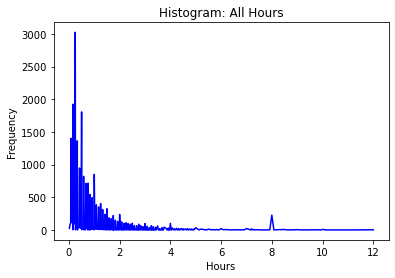

In [53]:
print(f"Mean Hours: {round(combined_df['hours'].mean(),4)}")
print(f"Median Hours: {combined_df['hours'].median()}")
print(f"Mode Hours: {combined_df['hours'].mode()}")
print(f"Spread Hours: {combined_df['hours'].max() - combined_df['hours'].min()}")
print(f"Total Tasks: {len(combined_df['hours'])}")



#//*** Get Histogram of total Hours 
total_hours_hist = combined_df['hours'].value_counts().sort_index()

plt.plot(total_hours_hist.index, total_hours_hist,1,color="b")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Histogram: All Hours")
plt.show()



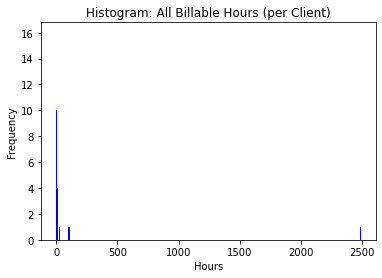

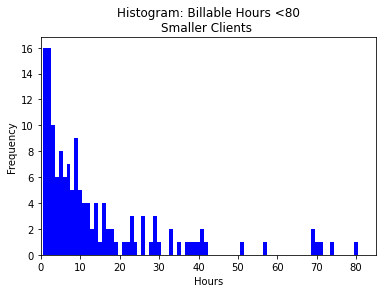

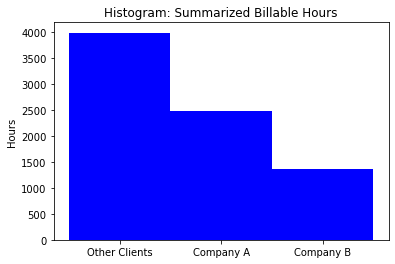

Total Billable Hours: 7838.17
Other Hours: 0.5084311771752845
Company A Hours: 0.31691070747381084
Company B Hours: 0.1746581153509046


In [54]:
# //*** Productivity Data Frame: These Jobs make the money
billable_df = combined_df[combined_df['jobcode_2'].str.len() > 2]

#//*** Histogram of all billable hours. NOT EVENly distributed
#//*** Two Clients represent 50% of all hours. The remaining hours are split amongst many clients.
billable_hist = get_hist_variable_by_hours(billable_df,'jobcode_1')

#//*** Get hours of other clients (all hours minus the big client hours.)
other_total_hours = billable_df['hours'].sum() - 2484 - 1369

plt.bar(billable_hist.index, billable_hist,1,color="b")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Histogram: All Billable Hours (per Client)")
plt.show()

plt.bar(billable_hist.index, billable_hist,1,color="b")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.xlim(0,85)
plt.title("Histogram: Billable Hours <80\nSmaller Clients ")
plt.show()

plt.bar(['Other Clients',"Company A", "Company B"], [other_total_hours,2484,1369],1,color="b")
plt.ylabel('Hours')
plt.title("Histogram: Summarized Billable Hours")
plt.show()
total_billable_hours = other_total_hours +2484+1369
print(f"Total Billable Hours: {total_billable_hours}")
print(f"Other Hours: {other_total_hours/total_billable_hours}")
print(f"Company A Hours: {2484/total_billable_hours}")
print(f"Company B Hours: {1369/total_billable_hours}")



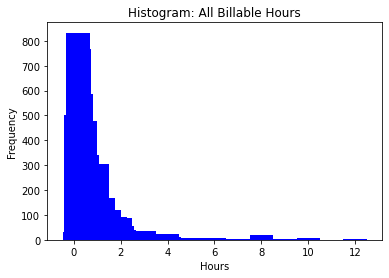

In [55]:
# //*** Productivity Data Frame: These Jobs make the money
billable_df = combined_df[combined_df['jobcode_2'].str.len() > 2]

billable_hist = billable_df['hours'].value_counts().sort_index()

plt.bar(billable_hist.index, billable_hist,1,color="b")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Histogram: All Billable Hours")
plt.show()

0.02      18
0.03      34
0.05      64
0.07      69
0.08     767
        ... 
10.00      2
10.13      1
10.17      1
10.67      1
11.25      1
Name: hours, Length: 275, dtype: int64


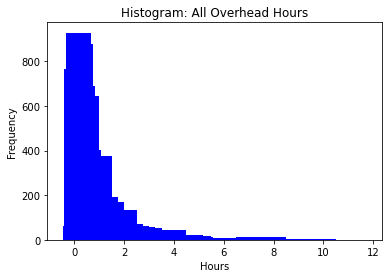

In [56]:
# //*** Overhead Work: It's Work that's gotta get done
overhead_df = combined_df[ combined_df['jobcode_1'].str.contains("Gabel",na=False) ]

overhead_hist = overhead_df['hours'].value_counts().sort_index()
print(overhead_hist)
plt.bar(overhead_hist.index, overhead_hist,1,color="b")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Histogram: All Overhead Hours")
plt.show()

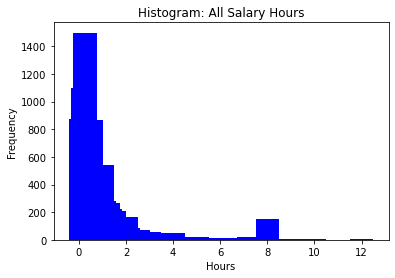

In [57]:
salary_df = combined_df[ combined_df['salary'] == 1]

salary_hours_hist = salary_df['hours'].value_counts().sort_index()

plt.bar(salary_hours_hist.index, salary_hours_hist,1,color="b")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Histogram: All Salary Hours")
plt.show()

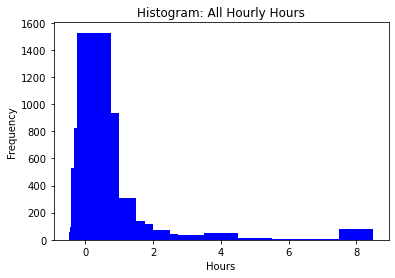

In [58]:
hourly_df = combined_df[ combined_df['salary'] == 0]

hourly_hours_hist = hourly_df['hours'].value_counts().sort_index()

plt.bar(hourly_hours_hist.index, hourly_hours_hist,1,color="b")
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Histogram: All Hourly Hours")
plt.show()

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails(Chapter 2)

In [59]:
print(combined_df['hours'].mean())
print(combined_df['hours'].median())
print(combined_df['hours'].mode())
print(np.std(combined_df['hours']))

0.9626596576592314
0.5
0    0.25
dtype: float64
1.3170262736816314


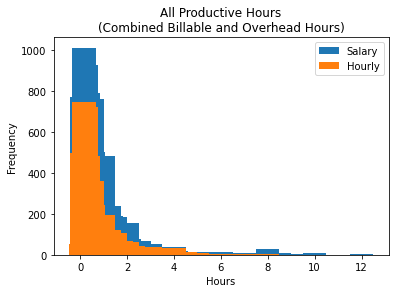

In [60]:
#//*** Build a Histogram of Salary vs Hourly Productive Hours
salary_df = combined_df[combined_df['salary'] == 1 ]
hourly_df = combined_df[combined_df['salary'] == 0 ]

salary_billable = salary_df[salary_df['jobcode_2'].isna() == False]['hours']
salary_overhead = salary_df[ salary_df['jobcode_1'].str.contains("Gabel",na=False) ]['hours']

hourly_billable = hourly_df[hourly_df['jobcode_2'].isna() == False]['hours']
hourly_overhead = hourly_df[ hourly_df['jobcode_1'].str.contains("Gabel",na=False) ]['hours']

#//*** Histogram of combined overhead and billable
salary_productive = pd.Series(list(salary_overhead.values) + list(salary_billable.values)).value_counts().sort_index()
hourly_productive = pd.Series(list(hourly_overhead.values) + list(hourly_billable.values)).value_counts().sort_index()

plt.bar(salary_productive.index,salary_productive,1,label="Salary")
plt.bar(hourly_productive.index,hourly_productive,1,label="Hourly")
plt.title("All Productive Hours\n(Combined Billable and Overhead Hours)")
plt.ylabel("Frequency")
plt.xlabel("Hours")
plt.legend()
plt.show()



#loop_billable_df = day_df[day_df['jobcode_2'].isna() == False]
    
#    loop_overhead_df = day_df[ day_df['jobcode_1'].str.contains("Gabel",na=False) ]

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF.  Reminder, this isn’t comparing two variables against each other –it is the same variable, but a different scenario.  Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring(Chapter 3)

878.3900000000001 1164.85 2043.24
525.76 754.79 1280.55
957.9399999999999 1236.06 2194.0
523.52 926.76 1450.28
965.4100000000001 1216.9899999999998 2182.3999999999996
562.28 763.42 1325.6999999999998
1078.0700000000002 1017.35 2095.42
624.96 791.92 1416.88
838.42 1237.1899999999998 2075.6099999999997
479.93000000000006 929.57 1409.5
salary: Monday       2043.24
Tuesday      2194.00
Wednesday    2182.40
Thursday     2095.42
Friday       2075.61
dtype: float64
Hourly: Monday       1280.55
Tuesday      1450.28
Wednesday    1325.70
Thursday     1416.88
Friday       1409.50
dtype: float64


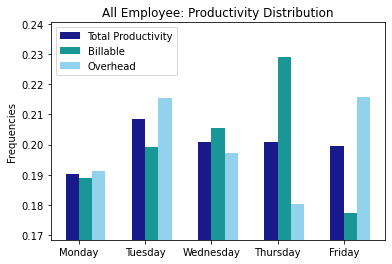

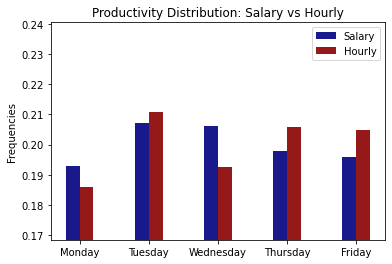

In [61]:
def build_pmf(input_series):
    output_series = input_series.copy()
    total_values = input_series.sum()
    for value,freq in output_series.items():
        #print(f"{value} {freq} {total_values} {freq/total_values}")
        output_series.loc[value] = freq/total_values
    return output_series

# //*** Productivity Data Frame: These Jobs make the money
billable_df = combined_df[combined_df['jobcode_2'].str.len() > 2]



# //*** Overhead Work: It's Work that's gotta get done
overhead_df = combined_df[ combined_df['jobcode_1'].str.contains("Gabel",na=False) ]

#print(productive_df['jobcode_1'].unique())
#print(overhead_df['jobcode_1'].unique())

total_employee_hours_distribution = []
billable_employee_hours_distribution = []
overhead_employee_hours_distribution = []
salary_billable_hours_distribution = []
salary_overhead_hours_distribution = []
hourly_billable_hours_distribution = []
hourly_overhead_hours_distribution = []
total_salary_productivity = []
total_hourly_productivity = []

for x in g['days_of_week']:
    
    # //*** Get income hours for all Employees by day
    loop_billable = billable_df[billable_df['day'].str.contains(x) ]['hours'].sum()
    loop_billable_salary_df = billable_df[billable_df['day'].str.contains(x) ]
    
    # //*** Salary Billable Hours
    loop_salary_billable =loop_billable_salary_df[loop_billable_salary_df['salary'] == 1]['hours'].sum()

    # //*** Hourly Billable Hours
    loop_hourly_billable = loop_billable_salary_df[loop_billable_salary_df['salary'] == 0]['hours'].sum()
    
    
    # //*** Get Overhead hours for all Employees by day
    loop_overhead = overhead_df[overhead_df['day'].str.contains(x) ]['hours'].sum()
    loop_overhead_df = overhead_df[overhead_df['day'].str.contains(x) ]

    # //*** Salary Billable Hours by day of week
    loop_salary_overhead =loop_overhead_df[loop_overhead_df['salary'] == 1]['hours'].sum()
    
    # //*** Hourly Billable Hours
    loop_hourly_overhead =loop_overhead_df[loop_overhead_df['salary'] == 0]['hours'].sum()
    
    
    #print(f"{loop_salary_billable} - {loop_hourly_billable} : {loop_salary_overhead} - {loop_hourly_overhead}")
    
    # //*** Add to the lists
    total_employee_hours_distribution.append(loop_billable + loop_overhead)
    
    print(f"{loop_salary_billable} {loop_salary_overhead} {loop_salary_billable + loop_salary_overhead}" )
    print(f"{loop_hourly_billable} {loop_hourly_overhead} {loop_hourly_billable + loop_hourly_overhead}")
    
    total_salary_productivity.append(loop_salary_billable + loop_salary_overhead)
    total_hourly_productivity.append(loop_hourly_billable + loop_hourly_overhead)
    
    billable_employee_hours_distribution.append(loop_billable)
    overhead_employee_hours_distribution.append(loop_overhead)
    salary_billable_hours_distribution.append(loop_salary_billable) 
    salary_overhead_hours_distribution.append(loop_salary_overhead)
    hourly_billable_hours_distribution.append(loop_hourly_billable)
    hourly_overhead_hours_distribution.append(loop_hourly_overhead)


total_employee_hours_distribution = pd.Series( index=g['days_of_week'], data= total_employee_hours_distribution)
total_employee_hours_distribution_pmf = build_pmf(total_employee_hours_distribution)

billable_employee_hours_distribution = pd.Series(index=g['days_of_week'], data= billable_employee_hours_distribution)
billable_employee_hours_distribution_pmf = build_pmf(billable_employee_hours_distribution)

overhead_employee_hours_distribution = pd.Series(index=g['days_of_week'], data= overhead_employee_hours_distribution)
overhead_employee_hours_distribution_pmf = build_pmf(overhead_employee_hours_distribution)

salary_billable_hours_distribution = pd.Series(index=g['days_of_week'], data= salary_billable_hours_distribution)
salary_billable_hours_distribution = build_pmf(salary_billable_hours_distribution)

salary_overhead_hours_distribution = pd.Series(index=g['days_of_week'], data= salary_overhead_hours_distribution)
salary_overhead_hours_distribution = build_pmf(salary_overhead_hours_distribution)

hourly_billable_hours_distribution = pd.Series(index=g['days_of_week'], data= hourly_billable_hours_distribution)
hourly_billable_hours_distribution = build_pmf(hourly_billable_hours_distribution)

hourly_overhead_hours_distribution = pd.Series(index=g['days_of_week'], data= hourly_overhead_hours_distribution)
hourly_overhead_hours_distribution = build_pmf(hourly_overhead_hours_distribution)

total_salary_productivity = pd.Series(index=g['days_of_week'], data= total_salary_productivity)
total_salary_productivity_pmf = build_pmf(total_salary_productivity)
total_hourly_productivity = pd.Series(index=g['days_of_week'], data= total_hourly_productivity)
total_hourly_productivity_pmf = build_pmf(total_hourly_productivity)

print(f"salary: {total_salary_productivity}")
print(f"Hourly: {total_hourly_productivity}")

#print(total_employee_hours_distribution_pmf)
#print(billable_employee_hours_distribution_pmf)
#print(overhead_employee_hours_distribution_pmf)    
#print(salary_billable_hours_distribution)    
#print(salary_overhead_hours_distribution)    
#print(hourly_billable_hours_distribution)    
#print(hourly_overhead_hours_distribution)    

#plt.style.use('ggplot')
n = 5
var1 = total_employee_hours_distribution_pmf
var2 = billable_employee_hours_distribution_pmf
var3 = overhead_employee_hours_distribution_pmf
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.9
ax.bar(index, var1, bar_width, alpha=opacity, color='navy',label='Total Productivity')
               
ax.bar(index+bar_width, var2, bar_width, alpha=opacity, color='darkcyan', label='Billable')
ax.bar(index+(bar_width*2), var3, bar_width, alpha=opacity, color='skyblue', label='Overhead')
plt.ylim(billable_employee_hours_distribution_pmf.min() * .95,billable_employee_hours_distribution_pmf.max() * 1.05)
#ax.set_xlabel('Seasons')
ax.set_ylabel('Frequencies')
plt.title(f"All Employee: Productivity Distribution")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(g['days_of_week'])
ax.legend()
plt.show()


n = 5
var1 = total_salary_productivity_pmf
var2 = total_hourly_productivity_pmf
#var3 = overhead_employee_hours_distribution_pmf
fig, ax = plt.subplots()
index = np.arange(n)
bar_width = 0.2
opacity = 0.9
ax.bar(index, var1, bar_width, alpha=opacity, color='navy',label='Salary')
               
ax.bar(index+bar_width, var2, bar_width, alpha=opacity, color='darkred', label='Hourly')
#ax.bar(index+(bar_width*2), var3, bar_width, alpha=opacity, color='skyblue', label='Overhead')
plt.ylim(billable_employee_hours_distribution_pmf.min() * .95,billable_employee_hours_distribution_pmf.max() * 1.05)
#ax.set_xlabel('Seasons')
ax.set_ylabel('Frequencies')
plt.title(f"Productivity Distribution: Salary vs Hourly")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(g['days_of_week'])
ax.legend()
plt.show()


Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer(Chapter 4).

['Holiday' 'Lunch Break' 'Rest Break' 'PTO' 'Vacation']
1071.58
5045.8
6086.7


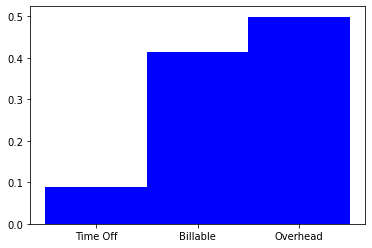

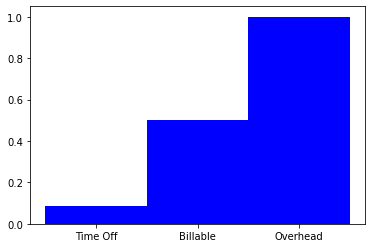

In [62]:
# //*** Build a Cumulative Distribution Function from a Probability Mass Function
# //*** Returns a Series
def build_cdf(input_series):
    # //*** If input is not panda or pd series, try to convert it
    if not isinstance(input_series,pd.core.series.Series):
        input_series = pd.Series(input_series)
        
    # //*** If input is np.Array
    output_series = input_series.copy()
    cumulative_value = 0
    for value,freq in output_series.items():
        #print(f"{value} {freq} {cumulative_value} {freq + cumulative_value}")
        cumulative_value = freq + cumulative_value
        output_series.loc[value] = cumulative_value
    return output_series

combined_employee_breaks = combined_df[ combined_df['activity'].isna() ]
combined_employee_breaks = combined_employee_breaks[ combined_employee_breaks['billable'].isna()]
combined_employee_breaks = combined_employee_breaks[ combined_employee_breaks['jobcode_1'] != "K2D Consulting Engineers"]
print(combined_employee_breaks['jobcode_1'].unique())

combined_employee_breaks_salary_1 = combined_employee_breaks[combined_employee_breaks['salary'] == 1 ]
combined_employee_breaks_salary_0 = combined_employee_breaks[combined_employee_breaks['salary'] == 0 ]

groups = combined_employee_breaks_salary_1.groupby('jobcode_1')

#//Excludingg Rest Break and Lunch Break, Since these times are non-billable and tracking if this time is arbitrary.
salary_timeoff_hours = 0

#//*** get Total hours for holiday PTO and Vacation
for group in groups:
    if group[0] in ['Holiday','PTO','Vacation']:
        salary_timeoff_hours += round(group[1]['hours'].sum(),2)

print(salary_timeoff_hours)

billable_salary_1_total = round(billable_df [billable_df['salary'] == 1 ]['hours'].sum(),2)
print(billable_salary_1_total)

overhead_salary_1_total = round(overhead_df [overhead_df['salary'] == 1 ]['hours'].sum(),2)

print(overhead_salary_1_total)
#//*** Build a salary CDF of time spent between TimeOff(Vacation, Timeoff )
salary_time_pmf = build_pmf(pd.Series(index=['Time Off','Billable','Overhead'], data=[salary_timeoff_hours,billable_salary_1_total,overhead_salary_1_total]))
salary_time_cdf = build_cdf(salary_time_pmf)

plt.bar(salary_time_pmf.index,salary_time_pmf,1,color="b")
plt.show()

plt.bar(salary_time_cdf.index,salary_time_cdf,1,color="b")
plt.show()


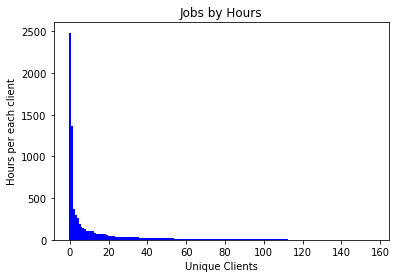

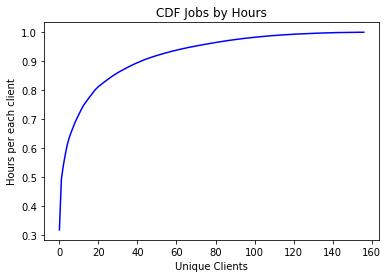

In [63]:
#pareto_cdf_series = scipy.stats.pareto.cdf(heights,scale=1, b=1.7)

billable_value_count = billable_df['jobcode_1'].value_counts().sort_values(ascending=False)

#print(billable_value_count)
# //********************************************************************
# //*** Build weighted values
# //********************************************************************
#print(f"{billable_value_count}")
#print(f"{jobcode1_value_count.index}")

# //*** Build a list of summed hours for each jobcode category
# //*** Loop through each billable jobcode to get the total hours for that job 
billable_hours_distribution = {}
for x in range(0,len(billable_value_count.index)):
    loop_key = billable_value_count.index[x]
    
    # //*** get total hours for each job
    billable_hours_distribution[loop_key] = combined_df[combined_df['jobcode_1'] == loop_key ]['hours'].sum()

# //*************************
# //*** Sort Billable Hours
# //*************************
# //*** https://www.geeksforgeeks.org/python-sort-python-dictionaries-by-key-or-value/
# //*** Builds a sorted dictionary
billable_hours_distribution = sorted(billable_hours_distribution.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
jobcode1_keys = []
jobcode1_values = []
# //*** Pull the sorted dictionary apart
for x in billable_hours_distribution:
    jobcode1_keys.append(x[0])
    jobcode1_values.append(x[1])

# //*** Reassemble as an ordered pandas series
billable_hours_distribution = pd.Series(index=jobcode1_keys, data=jobcode1_values)  

# //*** Build 
qlist = []
for x in range(0,len(billable_hours_distribution)):
    qlist.append(x)
# //*** Histogram with matplotlib
plt.bar(qlist, billable_hours_distribution, 1, color='b')
#plt.tight_layout()

#plt.xticks(jobcode1_value_count_top_20.index.values, jobcode1_value_count_top_20.index, rotation='vertical')
plt.title(f"Jobs by Hours")
plt.xlabel('Unique Clients')
plt.ylabel('Hours per each client')
plt.show()

#//*** CDF of Hours Distribution
billable_hours_distribution_cdf = build_cdf(build_pmf(billable_hours_distribution) )
plt.plot(qlist, billable_hours_distribution_cdf, 1, color='b')
#plt.tight_layout()

#plt.xticks(jobcode1_value_count_top_20.index.values, jobcode1_value_count_top_20.index, rotation='vertical')
plt.title(f"CDF Jobs by Hours")
plt.xlabel('Unique Clients')
plt.ylabel('Hours per each client')
plt.show()


Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5

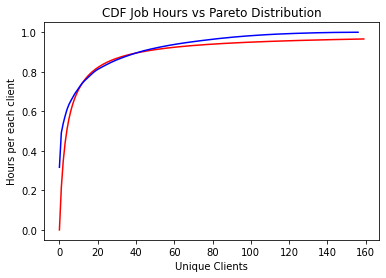

In [64]:
import scipy.stats
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html
a, m = 3, 10.  # shape and mode
a, m = 1, 5
#s = pd.Series( (np.random.pareto(a, 1000) ) * m ).value_counts().sort_index()
s = pd.Series( (np.random.default_rng(160).pareto(a, 1000) ) * m ).value_counts().sort_index()
s = s *10
s = build_cdf(build_pmf(s))


# //*** Generate a Pareto Culumlative distribution function as an np.array using a scale value of 1.7 (curve shape)
s = pd.Series(scipy.stats.pareto.cdf(np.linspace(6,160,160),scale=6, b=1))
s = pd.Series(scipy.stats.pareto.cdf(np.linspace(3,160,160),scale=3, b=.8))
s = pd.Series(scipy.stats.pareto.cdf(np.linspace(3,160,160),scale=3, b=.85))
s = pd.Series(scipy.stats.pareto.cdf(np.linspace(3,160,160),scale=3, b=.85))
#//*** Scale and Shape, Larger the scale, the more dispersed or flatter the curve, Shape affect the rate as it approaches to 100

#print(pareto_array)
plt.plot(s.index,s,1,color="red", label="Pareto Distribution")
plt.plot(qlist, billable_hours_distribution_cdf, 1, color='b', label="Job Hours")
plt.title("CDF Job Hours vs Pareto Distribution")
plt.xlabel('Unique Clients')
plt.ylabel('Hours per each client')
plt.show()
#print(billable_hours_distribution)

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis(Chapter 7).

In [65]:
#//*** Groups a df by input_groupby_col then calculates the input_sum_col.
#//*** Valid calcs are sum,mean
def calc_var_by_group(input_df,input_groupby_col,input_sum_col, calc="sum" ):
    
    output = []
    for label,loop_df in input_df.groupby(input_groupby_col):
        
        output.append(loop_df[input_sum_col].sum())
    
    if len(output) == 0:
            return 0
    if calc == "sum":
        return pd.Series(output).sum()
    
    if calc == "mean":
        return pd.Series(output).mean()
#//Correlate Productivity between Salary Employees and Timeoff
#//*** Compary to Hourly Employees and TimeOff

#//*** Do a Time Series Plot Salary Productive Hours vs Timeoff

year_dates = []

#//*** - task_length_mean - average length of all tasks on a given day/category
#//*** - total_hours -      total hours of all tasks on a given day/category
#//*** - emp_hours_mean -   average total hours each employeeon a given/category (average productivity measure)

day = {
    "salary" : {
        "billable" : {
            "task_length_mean" : [],
            "total_hours" : [],
            "emp_hours_mean" : [],
        },
        "overhead" : {
            "task_length_mean" : [],
            "total_hours" : [],
            "emp_hours_mean" : [],
        },
        "productivity" : {
            "task_length_mean" : [],
            "total_hours" : [],
            "emp_hours_mean" : [],
        },
        "timeoff" : [],
        "emps": {},
    },
    "hourly" : {
        "billable" : {
            "task_length_mean" : [],
            "total_hours" : [],
            "emp_hours_mean" : [],
        },
        "overhead" : {
            "task_length_mean" : [],
            "total_hours" : [],
            "emp_hours_mean" : [],
        },
        "productivity" : {
            "task_length_mean" : [],
            "total_hours" : [],
            "emp_hours_mean" : [],
        },
        "timeoff" : [],
        "emps" : {},
    },
    
}

salary_emps = combined_df['emp_name'][combined_df['salary']==1].unique()
hourly_emps = combined_df['emp_name'][combined_df['salary']==0].unique()

for date,day_df in combined_df.groupby('local_date'):
    
    #//*** Add the Date
    year_dates.append(date)
    
    #//*** Skip Weekends
    #if len(day_df[day_df["day_int"] > 4]) > 0:
        #continue
    
    #print(day_df[day_df['salary']==1])
    loop_billable_df = day_df[day_df['jobcode_2'].isna() == False]
    
    loop_overhead_df = day_df[ day_df['jobcode_1'].str.contains("Gabel",na=False) ]

    loop_vacation = day_df[ day_df['activity'].isna() ]
    loop_vacation = loop_vacation[ loop_vacation['billable'].isna()]
    loop_vacation = loop_vacation[ loop_vacation['jobcode_1'] != "K2D Consulting Engineers"]
    
    #this_df = loop_vacation[ loop_vacation['salary']==1 ]
    
    #//*** Add Vacation and PTO 
    #//*** Salary gets Vacation
    #//*** Hourly gets PTO
    day['salary']['timeoff'].append(loop_vacation[loop_vacation ['jobcode_1'] == "Vacation"]['hours'].sum())
    day['hourly']['timeoff'].append(loop_vacation[loop_vacation ['jobcode_1'] == "PTO"]['hours'].sum())
    
    
    #if not this_df.empty:
        #this_df = this_df[this_df['jobcode_1']=='Vacation']
        #print(this_df)
    
    
    #//*** Get All Salary productive Hours
    #//*** Get Mean Salary Productive Hours
    this_df = loop_billable_df[ loop_billable_df['salary']==1 ]

    #//*** Grab Values to sum for productivity
    s_b_tlm = this_df['hours'].replace(np.nan, 0).mean()
    s_b_th = this_df['hours'].replace(np.nan, 0).sum()
    s_b_ehm = calc_var_by_group(this_df,'emp_name','hours',calc='mean')
    day['salary']['billable']["task_length_mean"].append(s_b_tlm)
    day['salary']['billable']["total_hours"].append(s_b_th)
    day['salary']['billable']["emp_hours_mean"].append(s_b_ehm)

    this_df = loop_billable_df[ loop_billable_df['salary']==0 ]

    #//*** Grab Values to sum for productivity
    h_b_tlm = this_df['hours'].replace(np.nan, 0).mean()
    h_b_th = this_df['hours'].replace(np.nan, 0).sum()
    h_b_ehm = calc_var_by_group(this_df,'emp_name','hours',calc='mean')

    day['hourly']['billable']["task_length_mean"].append(h_b_tlm)
    day['hourly']['billable']["total_hours"].append(h_b_th)
    day['hourly']['billable']["emp_hours_mean"].append(h_b_ehm)

    #//*** Overhead hours
    this_df = loop_overhead_df[loop_overhead_df['salary']==1]

    #//*** Grab Values to sum for productivity
    s_o_tlm = this_df['hours'].replace(np.nan, 0).mean()
    s_o_th = this_df['hours'].replace(np.nan, 0).sum()
    s_o_ehm = calc_var_by_group(this_df,'emp_name','hours',calc='mean')

    day['salary']['overhead']["task_length_mean"].append(s_o_tlm)
    day['salary']['overhead']["total_hours"].append(s_o_th)
    day['salary']['overhead']["emp_hours_mean"].append(s_o_ehm)

    this_df = loop_overhead_df[loop_overhead_df['salary']==0]
    #//*** Grab Values to sum for productivity
    h_o_tlm = this_df['hours'].replace(np.nan, 0).mean()
    h_o_th = this_df['hours'].replace(np.nan, 0).sum()
    h_o_ehm = calc_var_by_group(this_df,'emp_name','hours',calc='mean')

    day['hourly']['overhead']["task_length_mean"].append(h_o_tlm)
    day['hourly']['overhead']["total_hours"].append(h_o_th)
    day['hourly']['overhead']["emp_hours_mean"].append(h_o_ehm)

    #print(f"{s_b_tlm} {s_o_tlm} {s_b_tlm + s_o_tlm}")

    #//*** Build Productivity Values: Billable + Overhead
    day['salary']['productivity']["task_length_mean"].append( (s_b_tlm + s_o_tlm) /2 )
    day['salary']['productivity']["total_hours"].append(s_b_th + s_o_th)
    day['salary']['productivity']["emp_hours_mean"].append(s_b_ehm + s_o_ehm)

    day['hourly']['productivity']["task_length_mean"].append( (h_b_tlm + h_o_tlm)/2 ) 
    day['hourly']['productivity']["total_hours"].append(h_b_th + h_o_th)
    day['hourly']['productivity']["emp_hours_mean"].append(h_b_ehm + h_o_ehm)
    
    #//*** Build individual Employee Productivity / timeoff Hours
    
    #//*** Employee Mode makes it easier to copy/paste duplicated code
    emp_type = 'salary'
    for emp in salary_emps:
        #//*** Initialize default hour count
        vacation_hours = 0
        
        emp_overhead_hours = loop_overhead_df[loop_overhead_df['emp_name']==emp ]['hours'].sum()
        
        emp_billable_hours = loop_billable_df[loop_billable_df['emp_name']==emp ]['hours'].sum()
        if emp_type == 'salary':
            emp_vacation = loop_vacation[ loop_vacation['jobcode_1']=="Vacation"  ]
        else:
            emp_vacation = loop_vacation[loop_vacation ['jobcode_1'] == "PTO" ]
        
        #//*** Get emp Vacation Hours
        if emp in emp_vacation['emp_name'].unique():
            vacation_hours = emp_vacation[emp_vacation['emp_name']==emp ]['hours'].sum()

        #//*** Add Empty Dict if Key not exist
        if emp not in day[emp_type]["emps"].keys():
            day[emp_type]["emps"][emp] = {
                "productivity" : [],
                "vacation" : [],
            }
        
        day[emp_type]["emps"][emp]["vacation"].append(vacation_hours)
        day[emp_type]["emps"][emp]["productivity"].append( emp_overhead_hours + emp_billable_hours )

    emp_type = 'hourly'
    for emp in hourly_emps:
        #//*** Initialize default hour count
        vacation_hours = 0
        
        emp_overhead_hours = loop_overhead_df[loop_overhead_df['emp_name']==emp ]['hours'].sum()
        
        emp_billable_hours = loop_billable_df[loop_billable_df['emp_name']==emp ]['hours'].sum()
        
        if emp_type == 'salary':
            emp_vacation = loop_vacation[ loop_vacation['jobcode_1']=="Vacation"  ]
        else:
            emp_vacation = loop_vacation[loop_vacation ['jobcode_1'] == "PTO" ]
        
        #//*** Get emp Vacation Hours
        if emp in emp_vacation['emp_name'].unique():
            vacation_hours = emp_vacation[emp_vacation['emp_name']==emp ]['hours'].sum()

        #//*** Add Empty Dict if Key not exist
        if emp not in day[emp_type]["emps"].keys():
            day[emp_type]["emps"][emp] = {
                "productivity" : [],
                "vacation" : [],
            }
        
        day[emp_type]["emps"][emp]["vacation"].append(vacation_hours)
        day[emp_type]["emps"][emp]["productivity"].append( emp_overhead_hours + emp_billable_hours )
        
        


In [66]:
print("========================================================================")
t_avg_task  = round(pd.Series(day['salary']['billable']["task_length_mean"]).mean(),2)
t_avg_hours = round(pd.Series(day['salary']['billable']["emp_hours_mean"]).mean(),2)
t_tot_hrs   = round(pd.Series(day['salary']['billable']["total_hours"]).mean(),2)
print(f"Salary Billables: Mean Employee Hours - {t_avg_hours}")
print(f"Salary Billables: Mean Daily Task Length - {t_avg_task}")
print(f"Salary Billables: Mean Total Daily Hours - {t_tot_hrs}")
print("========================================================================")
t_avg_task  = round(pd.Series(day['hourly']['billable']["task_length_mean"]).mean(),2)
t_avg_hours = round(pd.Series(day['hourly']['billable']["emp_hours_mean"]).mean(),2)
t_tot_hrs   = round(pd.Series(day['hourly']['billable']["total_hours"]).mean(),2)
print(f"Hourly Billables: Mean Employee Hours - {t_avg_hours}")
print(f"Hourly Billables: Mean Daily Task Length - {t_avg_task}")
print(f"Hourly Billables: Mean Total Daily Hours - {t_tot_hrs}")
print("========================================================================")
t_avg_task  = round(pd.Series(day['salary']['overhead']["task_length_mean"]).mean(),2)
t_avg_hours = round(pd.Series(day['salary']['overhead']["emp_hours_mean"]).mean(),2)
t_tot_hrs   = round(pd.Series(day['salary']['overhead']["total_hours"]).mean(),2)
print(f"Salary Overhead: Mean Employee Hours - {t_avg_hours}")
print(f"Salary Overhead: Mean Daily Task Length - {t_avg_task}")
print(f"Salary Overhead: Mean Total Daily Hours - {t_tot_hrs}")
print("========================================================================")
t_avg_task  = round(pd.Series(day['hourly']['overhead']["task_length_mean"]).mean(),2)
t_avg_hours = round(pd.Series(day['hourly']['overhead']["emp_hours_mean"]).mean(),2)
t_tot_hrs   = round(pd.Series(day['hourly']['overhead']["total_hours"]).mean(),2)
print(f"Hourly Overhead: Mean Employee Hours - {t_avg_hours}")
print(f"Hourly Overhead: Mean Daily Task Length - {t_avg_task}")
print(f"Hourly Overhead: Mean Total Daily Hours - {t_tot_hrs}")
print("========================================================================")
t_avg_task  = round(pd.Series(day['salary']['productivity']["task_length_mean"]).mean(),2)
t_avg_hours = round(pd.Series(day['salary']['productivity']["emp_hours_mean"]).mean(),2)
t_tot_hrs   = round(pd.Series(day['salary']['productivity']["total_hours"]).mean(),2)
print(f"Salary Productivity: Mean Employee Hours - {t_avg_hours}")
print(f"Salary Productivity: Mean Daily Task Length - {t_avg_task}")
print(f"Salary Productivity: Mean Total Daily Hours - {t_tot_hrs}")
print("========================================================================")
t_avg_task  = round(pd.Series(day['hourly']['productivity']["task_length_mean"]).mean(),2)
t_avg_hours = round(pd.Series(day['hourly']['productivity']["emp_hours_mean"]).mean(),2)
t_tot_hrs   = round(pd.Series(day['hourly']['productivity']["total_hours"]).mean(),2)
print(f"Hourly Productivity: Mean Employee Hours - {t_avg_hours}")
print(f"Hourly Productivity: Mean Daily Task Length - {t_avg_task}")
print(f"Hourly Productivity: Mean Total Daily Hours - {t_tot_hrs}")
print("========================================================================")



Salary Billables: Mean Employee Hours - 3.39
Salary Billables: Mean Daily Task Length - 1.28
Salary Billables: Mean Total Daily Hours - 14.13
Hourly Billables: Mean Employee Hours - 2.89
Hourly Billables: Mean Daily Task Length - 0.86
Hourly Billables: Mean Total Daily Hours - 7.82
Salary Overhead: Mean Employee Hours - 3.48
Salary Overhead: Mean Daily Task Length - 1.21
Salary Overhead: Mean Total Daily Hours - 17.05
Hourly Overhead: Mean Employee Hours - 2.87
Hourly Overhead: Mean Daily Task Length - 1.05
Hourly Overhead: Mean Total Daily Hours - 11.79
Salary Productivity: Mean Employee Hours - 6.87
Salary Productivity: Mean Daily Task Length - 1.17
Salary Productivity: Mean Total Daily Hours - 31.18
Hourly Productivity: Mean Employee Hours - 5.76
Hourly Productivity: Mean Daily Task Length - 0.87
Hourly Productivity: Mean Total Daily Hours - 19.61


0.11005573799575538


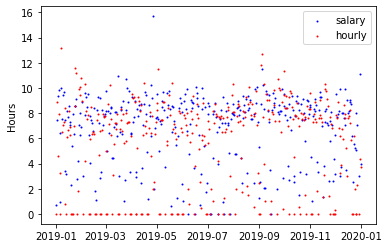

0.8405458172474254


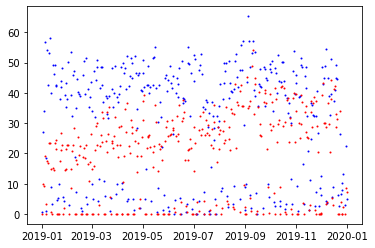

nan


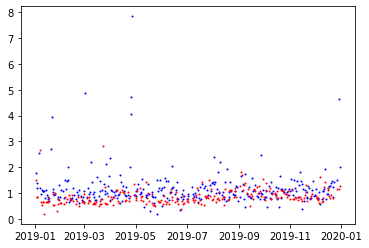

In [67]:
plt_salary=day['salary']['productivity']["emp_hours_mean"]
plt_hourly=day['hourly']['productivity']["emp_hours_mean"]
plt_sal_vac=day['salary']['timeoff']
this_cor = np.corrcoef(plt_salary,plt_sal_vac)[0][1]
print(this_cor)
#plt.bar(year_dates,plt_sal_vac,1,color="black",label='vacation')
#plt.title(f"Correlation" )
plt.scatter(year_dates,plt_salary,1,color="b",label='salary')
plt.scatter(year_dates,plt_hourly,1,color="r",label='hourly')
plt.legend()
plt.ylabel("Hours")
plt.show()

plt_salary=day['salary']['productivity']["total_hours"]
plt_hourly=day['hourly']['productivity']["total_hours"]
this_cor = np.corrcoef(plt_salary,plt_hourly)[0][1]
print(this_cor)
plt.scatter(year_dates,plt_salary,1,color="b",label='salary')
plt.scatter(year_dates,plt_hourly,1,color="r",label='hourly')
plt.show()

plt_salary=day['salary']['productivity']["task_length_mean"]
plt_hourly=day['hourly']['productivity']["task_length_mean"]
this_cor = np.corrcoef(plt_salary,plt_hourly)[0][1]
print(this_cor)
plt.scatter(year_dates,plt_salary,1,color="b",label='salary')
plt.scatter(year_dates,plt_hourly,1,color="r",label='hourly')
plt.show()


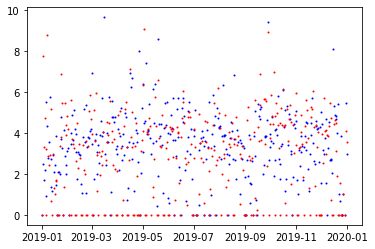

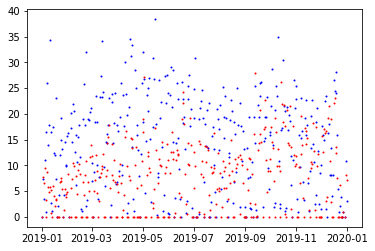

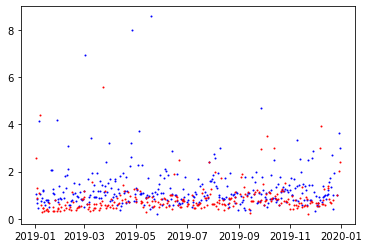

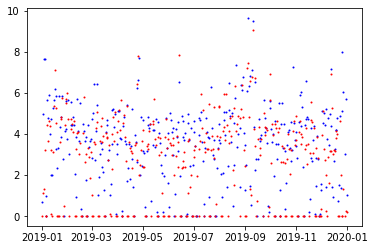

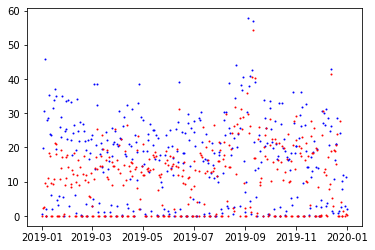

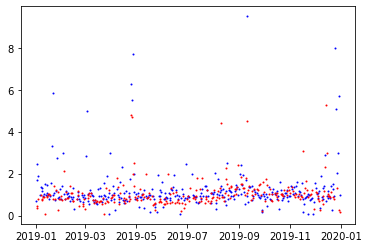

In [68]:

plt_salary=day['salary']['billable']["emp_hours_mean"]
plt_hourly=day['hourly']['billable']["emp_hours_mean"]
plt.scatter(year_dates,plt_salary,1,color="b")
plt.scatter(year_dates,plt_hourly,1,color="r")
plt.show()

plt_salary=day['salary']['billable']["total_hours"]
plt_hourly=day['hourly']['billable']["total_hours"]
plt.scatter(year_dates,plt_salary,1,color="b")
plt.scatter(year_dates,plt_hourly,1,color="r")
plt.show()

plt_salary=day['salary']['billable']["task_length_mean"]
plt_hourly=day['hourly']['billable']["task_length_mean"]
plt.scatter(year_dates,plt_salary,1,color="b")
plt.scatter(year_dates,plt_hourly,1,color="r")
plt.show()

plt_salary=day['salary']['overhead']["emp_hours_mean"]
plt_hourly=day['hourly']['overhead']["emp_hours_mean"]
plt.scatter(year_dates,plt_salary,1,color="b")
plt.scatter(year_dates,plt_hourly,1,color="r")
plt.show()

plt_salary=day['salary']['overhead']["total_hours"]
plt_hourly=day['hourly']['overhead']["total_hours"]
plt.scatter(year_dates,plt_salary,1,color="b")
plt.scatter(year_dates,plt_hourly,1,color="r")
plt.show()

plt_salary=day['salary']['overhead']["task_length_mean"]
plt_hourly=day['hourly']['overhead']["task_length_mean"]
plt.scatter(year_dates,plt_salary,1,color="b")
plt.scatter(year_dates,plt_hourly,1,color="r")
plt.show()


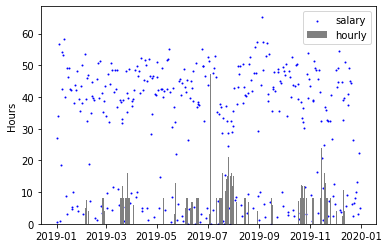

[[1.         0.02271645]
 [0.02271645 1.        ]]


In [69]:
plt_salary=day['salary']['productivity']["total_hours"]
plt_timeoff=day['salary']['timeoff']
#plt_hourly=day['hourly']['timeoff']
#plt.bar(year_dates,plt_sal_vac,1,color="black",label='vacation')
plt.scatter(year_dates,plt_salary,1,color="b",label='salary')
plt.bar(year_dates,plt_timeoff,1,color="gray",label='hourly')
plt.legend()
plt.ylabel("Hours")
plt.show()

print(np.corrcoef(day['salary']['productivity']["total_hours"],day['salary']['timeoff']))

In [70]:
# //**** Legends automatically generate too many labels.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

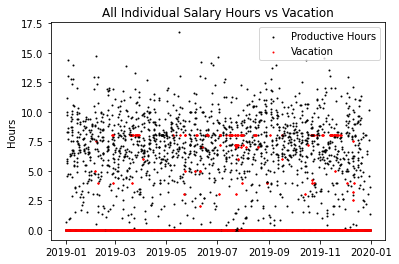

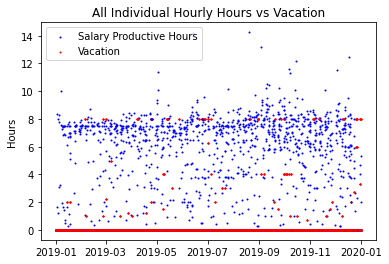

In [71]:
#//*** Plot Salary individual Productive Hours vs Vacation
salary_cors = []
fig,ax = plt.subplots()
for emp in salary_emps:
    #print(day['salary']["emps"][emp][productivity])
    plt_prod = day['salary']["emps"][emp]["productivity"]
    plt_vacation= day['salary']["emps"][emp]["vacation"]
    ax.scatter(year_dates,plt_prod,1,"black",label="Productive Hours")
    ax.scatter(year_dates,plt_vacation,1,"red",label="Vacation")
    ax.scatter(year_dates,plt_vacation,1,"red")
    ax.scatter(year_dates,plt_vacation,1,"red")

    salary_cors.append((np.corrcoef(plt_vacation,plt_prod)[0][1]))
    
handles,labels = deduplicate_legend(ax)
plt.title("All Individual Salary Hours vs Vacation")
plt.ylabel("Hours")
plt.legend(handles,labels )
plt.show()

hourly_cors = []
fig,ax = plt.subplots()
for emp in hourly_emps:
    #print(day['salary']["emps"][emp][productivity])
    plt_prod = day['hourly']["emps"][emp]["productivity"]
    plt_vacation= day['hourly']["emps"][emp]["vacation"]
    ax.scatter(year_dates,plt_prod,1,"blue",label="Salary Productive Hours")
    ax.scatter(year_dates,plt_vacation,1,"red",label="Vacation")
    ax.scatter(year_dates,plt_vacation,1,"red")
    ax.scatter(year_dates,plt_vacation,1,"red")
    if pd.Series(plt_vacation).sum() > 0:
        hourly_cors.append((np.corrcoef(plt_vacation,plt_prod)[0][1]))
handles,labels = deduplicate_legend(ax)
plt.title("All Individual Hourly Hours vs Vacation")
plt.ylabel("Hours")
plt.legend(handles,labels )
    
plt.show()



In [72]:
#//*** Look at Salary vs Hourly Correlations
print("Salary:")
for x in range(len(salary_cors)):
    print(salary_cors[x])
    
print(f"Salary Mean Correlation: {pd.Series(salary_cors).mean()}")
print("Hourly:")
for cor in hourly_cors:
    print(cor)
print(f"Mean Correlation: {pd.Series(hourly_cors).mean()}")


Salary:
-0.327714453424011
-0.2725834641972188
-0.0889985026497809
-0.338397117718373
-0.2804010721745739
-0.18040137319920707
Salary Mean Correlation: -0.2480826638938608
Hourly:
-0.27818688830287797
-0.13396014155704877
-0.10876369493391426
-0.28476914860412805
-0.043119729105559154
Mean Correlation: -0.16975992050070565


Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

In [73]:
#Try Serial Correlation
def serial_correlation_two_values(input_data1,input_data2,input_lag):
        #//*** Calculate the correlation between a variable and the offset (lag) of anoth. 
        #//*** A lag of 1, correlates with the previous value. This is exactly what we did with the COVID algorithm
        #//*** Automatically convert data1 to Series if needed
        if isinstance(input_data1, pd.Series) == False:
            input_data1 = pd.Series(data=input_data1)
        if isinstance(input_data2, pd.Series) == False:
            input_data2 = pd.Series(data=input_data2)

        #//*** Trim lag length from data
        #base_data = input_data1[input_lag:].copy()
        #//***
        base_data = input_data1[input_lag:].copy()
        #//*** Trim lag length from data, pd.Series.shift takes lag values from the top and append to the bottom.
        #//*** pd.Series does most of the index handling for us
        input_data2 = input_data2.shift(input_lag)[input_lag:].copy()
        input_data1 = base_data.copy()
        return np.corrcoef(input_data1,input_data2)[0][1]

#print(day['salary']['emps'][ salary_emps[0] ]['productivity'] ) 
#print()

for emp in salary_emps:
    cor1 = day['salary']['emps'][ emp ]['vacation']
    cor2 = day['salary']['emps'][ emp  ]['productivity']
    vacation_cor = np.corrcoef(cor1,cor2)[0][1]
    
    print("====================================")
    print("Salary - Vacation Productivity Correlation")
    print(f"{emp} -  {vacation_cor}")
    print("====================================")
    for x in [1,7,14,30,60,90,180]:
        print(f"Lag Day(s): {x} - {serial_correlation_two_values(cor1,cor2,x)}"  )

for emp in hourly_emps:
    cor1 = day['hourly']['emps'][ emp ]['vacation']
    cor2 = day['hourly']['emps'][ emp  ]['productivity']
    vacation_cor = np.corrcoef(cor1,cor2)[0][1]
    
    print("====================================")
    print("Hourly - Vacation Productivity Correlation")
    print(f"{emp} -  {vacation_cor}")
    print("====================================")
    for x in [1,7,14,30,60,90,180]:
        print(f"Lag Day(s): {x} - {serial_correlation_two_values(cor1,cor2,x)}"  )
    
    
        

Salary - Vacation Productivity Correlation
EMP_1 -  -0.327714453424011
Lag Day(s): 1 - -0.2569218668004691
Lag Day(s): 7 - -0.000688581781080181
Lag Day(s): 14 - 0.16891239584637527
Lag Day(s): 30 - 0.020820627934007373
Lag Day(s): 60 - -0.0010178650843009577
Lag Day(s): 90 - -0.013881107412249466
Lag Day(s): 180 - 0.02649270056897551
Salary - Vacation Productivity Correlation
EMP_2 -  -0.2725834641972188
Lag Day(s): 1 - -0.16444072191160883
Lag Day(s): 7 - 0.10436947254781348
Lag Day(s): 14 - 0.004329612473053029
Lag Day(s): 30 - 0.07858483514328996
Lag Day(s): 60 - -0.08530052669543851
Lag Day(s): 90 - 0.0264842132134322
Lag Day(s): 180 - 0.13233464609422982
Salary - Vacation Productivity Correlation
EMP_6 -  -0.0889985026497809
Lag Day(s): 1 - -0.06214784298615789
Lag Day(s): 7 - 0.024711423381506635
Lag Day(s): 14 - -0.021032549972780673
Lag Day(s): 30 - 0.0684731816880523
Lag Day(s): 60 - -0.002505749671990143
Lag Day(s): 90 - 0.05965411136491178
Lag Day(s): 180 - -0.0145147621378

C:\Users\newcomb\anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\newcomb\anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [74]:
print("Correlate Total Hours Worked with Timeoff")
cor1=day['salary']['productivity']["total_hours"]
cor2=day['salary']['timeoff']
print(np.corrcoef(cor1,cor2)[0][1])


cor1=day['hourly']['productivity']["total_hours"]
cor2=day['hourly']['timeoff']
print(np.corrcoef(cor1,cor2)[0][1])


print("Correlate: Daily Hours Worked with timeoff")
cor1=day['salary']['productivity']["emp_hours_mean"]
cor2=day['salary']['timeoff']
print(np.corrcoef(cor1,cor2)[0][1])


cor1=day['hourly']['productivity']["emp_hours_mean"]
cor2=day['hourly']['timeoff']
print(np.corrcoef(cor1,cor2)[0][1])


Correlate Total Hours Worked with Timeoff
0.02271645175145476
-0.005884351719428202
Correlate: Daily Hours Worked with timeoff
0.11005573799575538
0.056017682386859294


In [75]:
#//*** Resample Salary and Hourly and generate an estimated P value
import random
#//*** Takes a Series 
def get_weighted_resample(input_series,input_cdf):
    
        
        
        #//*** Generate Weighted percentages within the range of the CDF
        random_weights = [ random.uniform(input_cdf.min(),input_cdf.max()) for __ in range(len(input_series)) ]

        #//*** Convert List of Random weights into values from the CDF.
        resample = pd.Series(random.choices(list(input_series),weights=random_weights,k=len(input_series)))
        return resample

for emp in salary_emps:
    actual_vacation = pd.Series(day['salary']['emps'][ emp ]['vacation'])
    actual_hours = pd.Series(day['salary']['emps'][ emp  ]['productivity'])
    
    vacation_cdf = actual_vacation.value_counts().sort_index()
    hours_cdf = actual_hours.value_counts().sort_index()
    
    baseline_cor = np.corrcoef(actual_vacation,actual_hours)[0][1]
    #print(f"BaseLine: {abs(baseline_cor)}")
    
    #//*** Perform Random Tests. Get the percentage of random correlations that are
    #//*** Greater than the observed (baseline) value
    test_total = 100
    null_count = .01
    for test in range(test_total):
        random_vacation = get_weighted_resample(actual_vacation,vacation_cdf)
        random_hours = get_weighted_resample(actual_hours,hours_cdf)
        random_cor = np.corrcoef(random_vacation,random_hours)[0][1]
        if abs(baseline_cor) < abs(random_cor):
            #print(f"{abs(baseline_cor)} < {abs(random_cor)} - {abs(baseline_cor) < abs(random_cor)}")
            null_count +=1
        
    p_value = null_count / test_total
    
    print(f"Salary Employee: {emp} - {baseline_cor} p-Val: {p_value}")

for emp in hourly_emps:
    actual_vacation = pd.Series(day['hourly']['emps'][ emp ]['vacation'])
    actual_hours = pd.Series(day['hourly']['emps'][ emp  ]['productivity'])
    
    vacation_cdf = actual_vacation.value_counts().sort_index()
    hours_cdf = actual_hours.value_counts().sort_index()
    
    baseline_cor = np.corrcoef(actual_vacation,actual_hours)[0][1]
    #print(f"BaseLine: {abs(baseline_cor)}")
    
    #//*** Perform Random Tests. Get the percentage of random correlations that are
    #//*** Greater than the observed (baseline) value
    test_total = 100
    null_count = .01
    for test in range(test_total):
        random_vacation = get_weighted_resample(actual_vacation,vacation_cdf)
        random_hours = get_weighted_resample(actual_hours,hours_cdf)
        random_cor = np.corrcoef(random_vacation,random_hours)[0][1]
        if abs(baseline_cor) < abs(random_cor):
            #print(f"{abs(baseline_cor)} < {abs(random_cor)} - {abs(baseline_cor) < abs(random_cor)}")
            null_count +=1
        
    p_value = null_count / test_total
    
    print(f"Hourly Employee: {emp} - {baseline_cor} p-Val: {p_value}")
    
    
    
        


Salary Employee: EMP_1 - -0.327714453424011 p-Val: 0.0001
Salary Employee: EMP_2 - -0.2725834641972188 p-Val: 0.0001
Salary Employee: EMP_6 - -0.0889985026497809 p-Val: 0.0901
Salary Employee: EMP_8 - -0.338397117718373 p-Val: 0.0001
Salary Employee: EMP_11 - -0.2804010721745739 p-Val: 0.0001
Salary Employee: EMP_12 - -0.18040137319920707 p-Val: 0.0001
Hourly Employee: EMP_3 - -0.27818688830287797 p-Val: 0.0001
Hourly Employee: EMP_4 - -0.13396014155704877 p-Val: 0.0301
Hourly Employee: EMP_5 - -0.10876369493391426 p-Val: 0.0101
Hourly Employee: EMP_7 - -0.28476914860412805 p-Val: 0.0001
Hourly Employee: EMP_9 - nan p-Val: 0.0001
Hourly Employee: EMP_10 - -0.043119729105559154 p-Val: 0.4201


In [76]:
#//*********************************************************************
#//*** Quick regression model results using patsy formula.
#//*********************************************************************
#//*** input_dict kwargs:
#//*** summary (boolean) - Display a summary evaluation of the model
#//*** pval (boolean) - Display the p-value of the model
#//*** getrsquared (boolean) - returns the r**2 value of the model
#//*** getpvalue (boolean) - returns the p value of the model
#//*** getmodel (boolean) - returns the model
#//*** method (string) - model type to run
#//***       ols (default) - Ordinary Least Squares (linear regression)
#//***       poisson - Poisson regression
#//***       logit - logistic regression.
#//*** Single output are returned as a single tyoe
#//*** Multiple outots return as a string in the following order: rsquared, pvalue, model
#//*****************************************************************************************
def qmodel_patsy_ols(df,formula,**input_dict):
    #//*** Check that Statsmodel is loaded.
    #//*** Requires the sys library which imports if not in use.
    try:
        if 'sys' not in sys.modules:
            print(f"{sys.modules}")
        else:
            import sys
    except:
        import sys

    if 'sm' not in sys.modules:
        try:
            import statsmodels.api as sm
        except:
            print(f"This Function requires the 'statsmodel' library to be installed")
            return
    if 'sm' not in sys.modules:
        try:
            import statsmodels.formula.api as smf
        except:
            print(f"This Function requires the 'statsmodel' library to be installed")
            return

    output = []
    display_summary = False
    display_pval = False
    getpvalue = False
    getrsquared = False
    getmodel = False
    method = "ols"
    getresults = False
    generalError = False
    
    for key,value in input_dict.items():
        if key == 'summary':
            display_summary = value
        if key == 'pvalue':
            display_pval = value
        if key == 'getpvalue':
            getpvalue = value
        if key == 'getrsquared':
            getrsquared = value
        if key == 'method':
            method = value
        if key == 'getmodel':
            getmodel = value
        if key == 'getresults':
            getresults = value

    if method == "ols":
        model = smf.ols(formula=formula, data=df)
        results = model.fit()
    elif method == "poisson":
        model = smf.poisson(formula, data=join).fit()
        results = model.fit()
    elif method == "logit":
        try:
            #model = smf.logit(formula, data=df).fit()
            model = smf.logit(formula, data=df)
            
            #//*** Endogenous variables designates variables in an economic/econometric model that are explained, or predicted, by that mode
            #//*** Test for endogenous variables. If less than half the variables are explained by the model, reject the model.
            nobs = len(model.endog)
            
            if nobs < len(df)/2:
                generalError = True
            else:
                results = model.fit()
                results = model.fit()

        except:
            generalError = True
    else:
        print(f"Provide a valid Method:\n method='ols' [default]\nmethod='logit'")
        return
    # //*** On an error return 999 for all requested values
    if generalError:
        if getrsquared:
            output.append(999)

        if getpvalue:
            output.append(pd.Series(data=[999]))
        
        return output
        
    #//**** Display Methods
    if display_summary:
        print("==========================")
        print("Q model Quick Display")
        print("==========================")
        print_model = results.summary()
        print(f"{print_model}")
    if display_pval:
        print("==========================")
        print("Q model P Values")
        print("==========================")
        results.pvalues.drop(['Intercept'])
        for x,y in results.pvalues.items():
            if x != 'Intercept':
                print(f"{x} : {y}")

    #//**** Return Methods            
    if getmodel:
        output.append(model)
    if getresults:
        output.append(results)

    if getrsquared:
        if method == "logit":
            output.append(results.prsquared)
        else:
            output.append(results.rsquared)
    
    if getpvalue:
        try:
            output.append(results.pvalues.drop(index='Intercept') )
        except:
            output.append(results.pvalues.values)
    

    #//*** If more than one output variable, output a list
    if len(output) > 1:
        return output
    elif len(output) == 1:
        #//*** Single elements, just return the element
        return output[0]
        
        
        

Intercept    4.354012
vacation    -0.530665
dtype: float64
4.354011976047907 0.5306645404842487
6.519390863176833


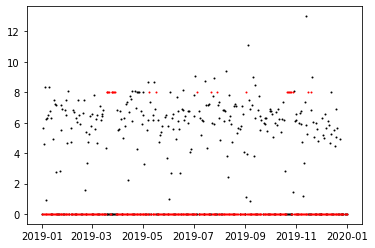

In [77]:
#//***https://www.geeksforgeeks.org/ordinary-least-squares-ols-using-statsmodels/
#for emp in salary_emps:
actual_vacation = pd.Series(day['salary']['emps'][ salary_emps[0] ]['vacation'])
actual_hours = pd.Series(day['salary']['emps'][ salary_emps[0]  ]['productivity'])

emp_df = pd.DataFrame()
emp_df['vacation'] = actual_vacation
emp_df['productivity'] = actual_hours

emp_model = qmodel_patsy_ols(emp_df,"productivity~vacation",getmodel=True)

results = emp_model.fit()
print(results.params)

inter = results.params[0]
coef = abs(results.params[1])

print(f"{inter} {coef}")
x_filler = np.arange(1, len(actual_vacation)+1, 1) 
# the substituted equation 

fig,ax = plt.subplots()

#print(day['salary']["emps"][emp][productivity])
plt_prod = actual_hours
plt_vacation= actual_vacation
y_model = pd.Series(coef * actual_hours + inter)

print(y_model.mean())
ax.scatter(year_dates,plt_prod,1,"black",label="Productive Hours")
ax.scatter(year_dates,plt_vacation,1,"red",label="Vacation")
#ax.scatter(year_dates,y_model,1,"green")

#print(y_model)

plt.show()

# range of values for plotting 
# the regression line 

#print(f"{len(x)} {len(actual_vacation)}")
  


Total Salary Employees: 6
-0.6617655334613892
Intercept    516.649259
vacation      -1.636000
dtype: float64
Salary Model: 516.65 -1.64
Salary rSquared: 0.43793362127743696
(No Vacation)  Coefficient per Employee: 86.11
(Max Vacation) Coefficient per Employee: 79.84
Total Salary Productive Hours: 11132.5
Total Salary Vacation Hours: 774.5
Mean Salary Productive Hours: 1855.42
Mean Salary Vacation Hours: 129.08
479.02125246229764


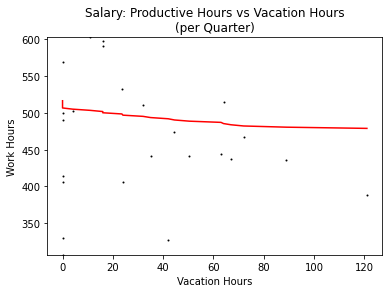

In [78]:
def build_plot_from_model(input_iter,input_coef,input_length):
    output = []
    for x in range(input_length):
        output.append(input_iter + (input_coef*x) )
    
    return output
    

#//*** Slpit a series into Quarters and sum the results
def get_summed_quarters(input_series, input_master_list):
    
    quarter_int = int(len(actual_hours)/4)
    
    input_master_list.append(input_series[:quarter_int].sum())
    input_master_list.append(input_series[quarter_int:quarter_int*2].sum())
    input_master_list.append(input_series[quarter_int*2:quarter_int*3].sum())
    input_master_list.append(input_series[quarter_int*3:].sum())
    
    return input_master_list



emp_quarter_productivity = []
emp_quarter_vacation = []

for emp in salary_emps:
    actual_vacation = pd.Series(day['salary']['emps'][ emp ]['vacation'])
    actual_hours = pd.Series(day['salary']['emps'][ emp  ]['productivity'])
    
    emp_quarter_vacation = get_summed_quarters(actual_vacation,emp_quarter_vacation)
    emp_quarter_productivity = get_summed_quarters(actual_hours,emp_quarter_productivity)
    

quarter_vacation_cor = np.corrcoef(emp_quarter_vacation,emp_quarter_productivity)[0][1]

print(f"Total Salary Employees: {len(salary_emps)}")
print(quarter_vacation_cor)

emp_df = pd.DataFrame()
emp_df['vacation'] = emp_quarter_vacation
emp_df['productivity'] = emp_quarter_productivity

qtr_prod_hist = emp_df['productivity'].value_counts().sort_index()
qtr_vac_hist = emp_df['vacation'].value_counts().sort_index()


emp_model = qmodel_patsy_ols(emp_df,"productivity~vacation",getmodel=True)

total_salary_emps = len(salary_emps)
results = emp_model.fit()
print(results.params)
inter = results.params[0]
coef = results.params[1]
y_model = build_plot_from_model(inter,coef,len(emp_quarter_vacation))
print(f"Salary Model: {round(inter,2)} {round(coef,2)}")
print(f"Salary rSquared: {results.rsquared}")
print(f"(No Vacation)  Coefficient per Employee: {round(inter/total_salary_emps,2)}")
print(f"(Max Vacation) Coefficient per Employee: {round(y_model[-1]/total_salary_emps,2)}")
print(f"Total Salary Productive Hours: {emp_df['productivity'].sum()}")
print(f"Total Salary Vacation Hours: {emp_df['vacation'].sum()}")
print(f"Mean Salary Productive Hours: {round(emp_df['productivity'].sum()/total_salary_emps,2)}")
print(f"Mean Salary Vacation Hours: {round(emp_df['vacation'].sum()/total_salary_emps,2)}")
print(y_model[-1])
salary_modeled_productivity_value = y_model[-1]/total_salary_emps
salary_mean_productivity_hours = emp_df['productivity'].sum()/total_salary_emps


fig,ax = plt.subplots()

plt_prod = emp_quarter_productivity
plt_vacation= emp_quarter_vacation
plt_prod_salary = emp_quarter_productivity
plt_vacation_salary = emp_quarter_vacation
y_model_salary = y_model
ax.scatter(sorted(emp_quarter_vacation),(emp_quarter_productivity),1,"black",label="Productive Hours")
ax.plot(sorted(emp_quarter_vacation),y_model,1,color="red")
plt.ylim(emp_df['productivity'].min(),emp_df['productivity'].max())
plt.title("Salary: Productive Hours vs Vacation Hours\n(per Quarter)")
plt.ylabel("Work Hours")
plt.xlabel("Vacation Hours")
plt.show()    

Salary Employees 6
Hourly Employees: 6
['EMP_1' 'EMP_2' 'EMP_6' 'EMP_8' 'EMP_11' 'EMP_12']
['EMP_3' 'EMP_4' 'EMP_5' 'EMP_7' 'EMP_9' 'EMP_10']
Hourly vacation Cor: 0.6050121933494857
hourly Model: 221.61963249471097 4.018642746460783
hourly rSquared: 0.3660397541015554
(No Vacation)  Coefficient per Employee: 36.94
(Max Vacation) Coefficient per Employee: 52.34
Total Hourly Productive Hours: 6999.99
Total Hourly Vacation Hours: 418.33
Mean Hourly Productive Hours: 1166.66
Mean Hourly Vacation Hours: 69.72


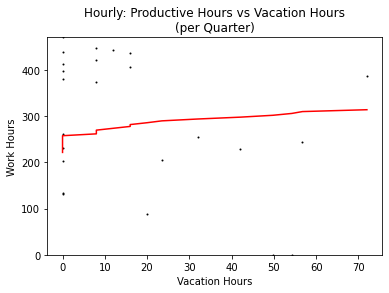

In [79]:
print(f"Salary Employees {len(salary_emps)}")
print(f"Hourly Employees: {len(hourly_emps)}")
print(salary_emps)
print(hourly_emps)

emp_quarter_productivity = []
emp_quarter_vacation = []

for emp in hourly_emps:
    actual_vacation = pd.Series(day['hourly']['emps'][ emp ]['vacation'])
    actual_hours = pd.Series(day['hourly']['emps'][ emp  ]['productivity'])
    
    emp_quarter_vacation = get_summed_quarters(actual_vacation,emp_quarter_vacation)
    emp_quarter_productivity = get_summed_quarters(actual_hours,emp_quarter_productivity)
    

quarter_vacation_cor = np.corrcoef(emp_quarter_vacation,emp_quarter_productivity)[0][1]

print(f"Hourly vacation Cor: {quarter_vacation_cor}")

emp_df = pd.DataFrame()
emp_df['vacation'] = emp_quarter_vacation
emp_df['productivity'] = emp_quarter_productivity



emp_model = qmodel_patsy_ols(emp_df,"productivity~vacation",getmodel=True)
total_hourly_emps = len(hourly_emps)
results = emp_model.fit()
#print(results.params)
inter = results.params[0]
coef = results.params[1]
y_model = build_plot_from_model(inter,coef,len(emp_quarter_vacation) )
y_model_hourly = build_plot_from_model(inter,coef,len(emp_quarter_vacation) )
print(f"hourly Model: {inter} {coef}")
print(f"hourly rSquared: {results.rsquared}")
print(f"(No Vacation)  Coefficient per Employee: {round(inter/total_hourly_emps,2)}")
print(f"(Max Vacation) Coefficient per Employee: {round(y_model[-1]/total_hourly_emps,2)}")
print(f"Total Hourly Productive Hours: {emp_df['productivity'].sum()}")
print(f"Total Hourly Vacation Hours: {emp_df['vacation'].sum()}")
print(f"Mean Hourly Productive Hours: {round(emp_df['productivity'].sum()/total_hourly_emps,2)}")
print(f"Mean Hourly Vacation Hours: {round(emp_df['vacation'].sum()/total_hourly_emps,2)}")

hourly_modeled_productivity_value = y_model[-1]/total_hourly_emps
hourly_mean_productivity_hours = emp_df['productivity'].sum()/total_hourly_emps

fig,ax = plt.subplots()
plt_prod = emp_quarter_productivity
plt_vacation= emp_quarter_vacation
plt_prod_hourly = emp_quarter_productivity
plt_vacation_hourly= emp_quarter_vacation
ax.scatter(sorted(plt_vacation),(plt_prod),1,"black",label="Productive Hours")
ax.plot(sorted(emp_quarter_vacation),y_model,1,color="red")
plt.ylim(emp_df['productivity'].min(),emp_df['productivity'].max())
plt.title("Hourly: Productive Hours vs Vacation Hours\n(per Quarter)")
plt.ylabel("Work Hours")
plt.xlabel("Vacation Hours")

plt.show()


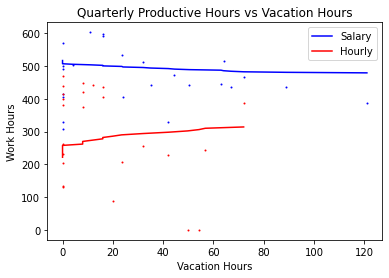

In [80]:
#plt_prod_salary = emp_quarter_productivity
#plt_vacation_salary = emp_quarter_vacation
#plt_prod_hourly = emp_quarter_productivity
#plt_vacation_hourly= emp_quarter_vacation

#y_model_salary = y_model
#y_model_hourly

fig,ax = plt.subplots()
#plt_prod = emp_quarter_productivity
#plt_vacation= emp_quarter_vacation
#ax.scatter(sorted(plt_vacation_salary),(plt_prod_salary),1,"blue",label="Productive Hours")
ax.scatter(sorted(plt_vacation_salary),(plt_prod_salary),1,"blue")
ax.plot(sorted(plt_vacation_salary),y_model_salary,1,color="blue",label="Salary")
ax.scatter(sorted(plt_vacation_hourly),(plt_prod_hourly),1,"red")
ax.plot(sorted(plt_vacation_hourly),y_model_hourly,1,color="red",label="Hourly")

plt.title("Quarterly Productive Hours vs Vacation Hours")
plt.ylabel("Work Hours")
plt.xlabel("Vacation Hours")
handles,labels = deduplicate_legend(ax)
plt.legend(handles,labels )
plt.show()

In [81]:
#//*** Resample Quarter year Vacation and Productivity to test the null hypothesis
actual_vacation = pd.Series(plt_vacation_salary)
actual_hours = pd.Series(plt_prod_salary)

vacation_cdf = actual_vacation.value_counts().sort_index()
hours_cdf = actual_hours.value_counts().sort_index()

baseline_cor = np.corrcoef(actual_vacation,actual_hours)[0][1]
#print(f"BaseLine: {abs(baseline_cor)}")

#//*** Perform Random Tests. Get the percentage of random correlations that are
#//*** Greater than the observed (baseline) value
test_total = 1000
null_count = 0
for test in range(test_total):
    random_vacation = get_weighted_resample(actual_vacation,vacation_cdf)
    random_hours = get_weighted_resample(actual_hours,hours_cdf)
    random_cor = np.corrcoef(random_vacation,random_hours)[0][1]
    if abs(baseline_cor) < abs(random_cor):
        #print(f"{abs(baseline_cor)} < {abs(random_cor)} - {abs(baseline_cor) < abs(random_cor)}")
        null_count +=1

p_value = null_count / test_total

print(f"Salary Quarterly Productivity: {baseline_cor} p-Val: {p_value}")


actual_vacation = pd.Series(plt_vacation_hourly)
actual_hours = pd.Series(plt_prod_hourly)

vacation_cdf = actual_vacation.value_counts().sort_index()
hours_cdf = actual_hours.value_counts().sort_index()

baseline_cor = np.corrcoef(actual_vacation,actual_hours)[0][1]
#print(f"BaseLine: {abs(baseline_cor)}")

#//*** Perform Random Tests. Get the percentage of random correlations that are
#//*** Greater than the observed (baseline) value
test_total = 1000
null_count = 0
for test in range(test_total):
    random_vacation = get_weighted_resample(actual_vacation,vacation_cdf)
    random_hours = get_weighted_resample(actual_hours,hours_cdf)
    random_cor = np.corrcoef(random_vacation,random_hours)[0][1]
    if abs(baseline_cor) < abs(random_cor):
        #print(f"{abs(baseline_cor)} < {abs(random_cor)} - {abs(baseline_cor) < abs(random_cor)}")
        null_count +=1

p_value = null_count / test_total

print(f"Hourly Quarterly Productivity: {baseline_cor} p-Val: {p_value}")

Salary Quarterly Productivity: -0.6617655334613892 p-Val: 0.001
Hourly Quarterly Productivity: 0.6050121933494857 p-Val: 0.003


In [82]:
#//***
print(f"Avg Salary annual Hours: {salary_mean_productivity_hours}")
print(f"Avg Hourly annual Hours: {hourly_mean_productivity_hours}")
print(f"Avg Salary Employee is {round(hourly_mean_productivity_hours/salary_mean_productivity_hours,4)*100}% more Productive than Hourly")

print()

print(f"Salary: Avg Annual Vacation Cost (in Hours): {salary_modeled_productivity_value}")
print(f"Hourly Productivity Value: {hourly_modeled_productivity_value}")

print(f"Productivity Cost: {salary_modeled_productivity_value/salary_mean_productivity_hours}")


Avg Salary annual Hours: 1855.4166666666667
Avg Hourly annual Hours: 1166.665
Avg Salary Employee is 62.88% more Productive than Hourly

Salary: Avg Annual Vacation Cost (in Hours): 79.83687541038294
Hourly Productivity Value: 52.34140261055149
Productivity Cost: 0.043029081739258714
